# Анализ критериев  успешной игры

***Описание проекта:*** 
Мы являемся аналитиками в интернет-магазине "Стримчик" (продажа игр по всему миру). У нас есть данные такие как: суммарная прибыль от подаж по играм в регионах, оценки пользователей и экспертов, жанры и платформы,  из открытых источников за предыдущий период (... - 2016 год). Наша задача понять и определить какие закономерности и зависимости могут привести к успеху игры. Для чего? Чтбы понять какой их наших продкутов будет более популярным в будующем и спланировать рекламные кампании по нему.

***Цель:*** 
Главной задачей данной работы является поиск и описание закономерностей или же "формулы" успешной игры на основе некоторых параметров игр, которые выпускались в 2016 году.


***План работы:***
1) В нашем распоряжении есть датасет с играми за 2016 год и раньше. Для начала откроем его и просмотрим общую инофрмацию по нему.

2) Далее скорректируем наши данные там, где это необходимо и подготовим их для дальнейшего анализа. Взглянем на пропуски, поищем дубликаты, преобразуем типы данных к необходимым у столбцов, где это нужно, а также скорректируем названия столбцов. Возможно, нам потребуется добавить несколько столбцов для дальнейших задач.

3) На этом шаге просмотрим определенные характеристики и построим по ним графики, а также опишем их. Взглянем на графики распределения, ну и возможно на этом шаге уже будут видны некоторые закономерности.

4) Просмотрим параметры по регионам, опишем и сделаем портрет пользователя по топовым параметрам у разных характеристик.

5) Кульминацией нашего проекта будет статистический анализ. Сформулируем гипотезы и проведем по ним тестирование.

Уверен, будет интересно и позновательно, так что начнем! 🚀

Но для начала, конечно же импортируем необходимые нам библиотеки!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Загрузка данных

### Считываем CSV-файл с данными и сохраняем датафрейм

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сразу бросаются в глаза пропуски как по количественным переменным, так и по категориальным переменным, но зато повезло с сепаратором.

### Просматриваем инфо о таблице

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Здесь можно сразу заметить, что в некоторых столбцах есть пропуски (genre, Critic_Score и др.), также некорректные типы данных у некоторых столбцов(Year_of_Release, User_Score)

### Итоги
В ходе первого шага: 

    1) Считали исходные данные с csv-файла и сохранили в датафрейм;
    2) Ознакомились с общей информацией по данным;
    3) Выявили, что некоторые столбцы содержат пропуски, некорректные типы данных.

## Предобработка и подготовка данных

### Скорректируем названия столбцов

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменим тип данных

Так как в столбце year_of_release у нас только год релиза, то преобразуем тип данных с float на int.

In [7]:
df = df.astype({'year_of_release': 'Int64'}) 

Далее столбец user_score

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Так как в столбце user_score у нас числовые данные c оценкой игры до 10, то сменим тип данных на float. Аббревиатурра tbd значит, что на момент сбора исходных данных, оценка еще не была выставлена. При переводе столбца в целочисленный тип данных, укажем, что неопознанные объекты принудительно менять на NaN.

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'], errors ='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Начнем обрабатывать пропуски по порядку. 
В столбце name всего два пропущенных значения, поэтому просто удалим их

In [12]:
df = df.dropna(subset=['name'])

Далее столбец year_of_release. Можно попробовать заменить пропущенные значения в данном столбце по медианному значению по соответствующим жанрам, однако не думаю, что это будет корректно, а так как пропусков всего 269, то удалим их.

In [13]:
df = df.dropna(subset=['year_of_release'])

In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Так как оценки пользователей и критиков сугубо индвидуальные, поэтому заменить пропуски по какой-либо зависимости не представляется возможным. Оставим пропуски как есть в столбцах critic_score и user_score.

Перед началом заменой пропусков в столбце rating разберемся в обозначениях

In [15]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Аббревиатуры рейтинга:

1) E (Everyone) - Содержание вполне подходит для всех возрастов;

2) M (Mature) - Материалы игры не подходят для лиц младше 17 лет;

3) T (Teen) - Игра подходит для лиц от 13 лет;

4) E10+ (Everyone 10 and older)  - Игра подходит для лиц от 10 лет;

5) K-A (Kids and Adults) - Игры, содержащие контент, подходящий для широкой аудитории

6) AO - (Adults Only 18+) Содержание игры только для взрослых старше 18 лет;

7) EC (Early childhood) - Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими;

8) RP (Rating Pending) - Рейтинг ожидается.

В данном случае предлагаю сделать замену на категорию "Other", так как пропусков слишком много, а рейтинги внутри как одного жанра, так и других параметров могут сильно разниться, то заменить пропуски по какой то зависимости нельзя.

In [16]:
df.loc[df['rating'].isna(), 'rating'] = 'Other'

In [17]:
df['rating'].unique()

array(['E', 'Other', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [18]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Отлично! Все пропуски исправлены.

### Дубликаты

С пропущенными значениями мы справились, проверим датафрейм на полные и неявные дубликаты

In [19]:
df.duplicated().sum()

0

Проверим игры у которых индентичное название, год выпуска и жанр

In [20]:
df[{'name', 'genre','year_of_release'}].duplicated().sum()

4248

Вот здесь то и есть дубликаты. Удалим их.

In [21]:
df = df.drop_duplicates(subset={'name', 'genre','year_of_release'},keep='first')

In [22]:
df[{'name', 'genre','year_of_release'}].duplicated().sum()

0

In [23]:
df.name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [24]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'WiiU', 'GC',
       'GEN', 'XOne', 'DC', 'SAT', 'PSV', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Wii и WiiU - разные приставки Nintendo

In [25]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Отлично! Дубликатов в исходном датафрейме нет. Проверим кол-во строк

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12196 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12196 non-null  object 
 1   platform         12196 non-null  object 
 2   year_of_release  12196 non-null  Int64  
 3   genre            12196 non-null  object 
 4   na_sales         12196 non-null  float64
 5   eu_sales         12196 non-null  float64
 6   jp_sales         12196 non-null  float64
 7   other_sales      12196 non-null  float64
 8   critic_score     5174 non-null   float64
 9   user_score       4736 non-null   float64
 10  rating           12196 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.1+ MB


Кол-во строк совпадает с учетом удаления пропусков в столбцах: name(2) и year_of_release(269) и сбросом дубликатов. Обновим индексы

In [27]:
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Other
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...
12191,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T
12192,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Other
12193,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Other
12194,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Other


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12196 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12196 non-null  object 
 1   platform         12196 non-null  object 
 2   year_of_release  12196 non-null  Int64  
 3   genre            12196 non-null  object 
 4   na_sales         12196 non-null  float64
 5   eu_sales         12196 non-null  float64
 6   jp_sales         12196 non-null  float64
 7   other_sales      12196 non-null  float64
 8   critic_score     5174 non-null   float64
 9   user_score       4736 non-null   float64
 10  rating           12196 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.1+ MB


### Добавляем столбец с суммарными продажами

In [29]:
df['total_income'] = df['na_sales'] + df['eu_sales'] + df['other_sales'] + df['other_sales']

In [30]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,87.22
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Other,34.20
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.02
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.44
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Other,22.16


### Итоги

В ходе подготовки данных к анализу: 

1) Скорректировали названия столбцов, сделали их строчными;

2) Изменили типы данных в таких столбцах как: year_of_release, user_score (в user_score значение tbd изменили на NaN);

3) Удалили пропуски в таких столбцах как: name, year_of_release ( также по столбцу name удалились и пропуски в столбцу genre), так как строк слишком мало, а также нет логичного присваивания значений;

4) Пропуски в столбцах user_score и critic_score заменили средним значением по соответствующим жанрам; 

5) Пропуски в столбце rating заменили на 'Other' для игр, выпущенных раньше 1994 года, для всех остальных наиболее популярным значением столбца rating по соответсвующему genre;

6) Также просмотрели дубликаты, как явные, так и не явные. В исходном датафрейме их не оказалось;

7) Добавили столбец с суммарной выручкой по всем регионам, включая столбец other_sales.

## Исследовательский анализ

###  Кол-во игр в разные годы

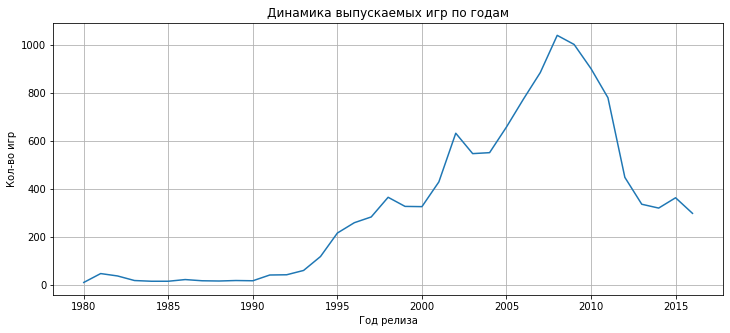

In [31]:
df.pivot_table(index='year_of_release', values = 'name', aggfunc ='count').plot(figsize=(12,5),legend=False,grid=True, title='Динамика выпускаемых игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр')
plt.show()


На графике видим, что игры до 1990-1991 года почти не выпускались, однако в последующие 19 лет был необычайный "бум" на игровой индустрии, что характеризуется довольно резким ростом выпускаемых игр. После пика в 2008 году (1400 игр) происходит начало стагнации выпуска игр, начиная с 2009 года кол-во выпускаемых игр начало падать (2015 год - 600 игр). Для более корректного анализа опустим игры выпускающиеся до 1991 года, но перед этип посмотрим на их долю в исходном датафрейме.

In [32]:
print('Процент игр до до 1991(включительно):',(len(df.loc[df['year_of_release'] <= 1991])/len(df))*100)

Процент игр до до 1991(включительно): 2.140045916693998


Т.к. процент всего ~1.6, то опустим эти значения

In [33]:
df = df.loc[df['year_of_release'] > 1991]

### Анализ продаж по платформам

Взглянем на топовые продажи по платформам

In [34]:
df.pivot_table(index={'platform'}, values='total_income', aggfunc='sum').sort_values(by='total_income',ascending=False)[0:5]


,total_income
platform,
PS2,1171.33
Wii,788.44
X360,626.41
PS,615.56
DS,594.41


Т.к. самые топовые продажи у таких платформ как: PS2, X360, PS3, Wii и DS. Построим для них графики по годам и опишем их.

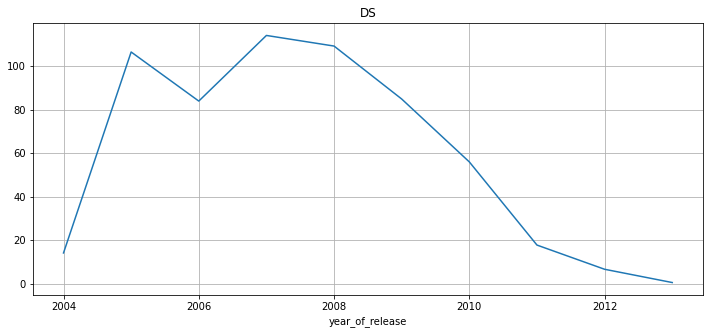

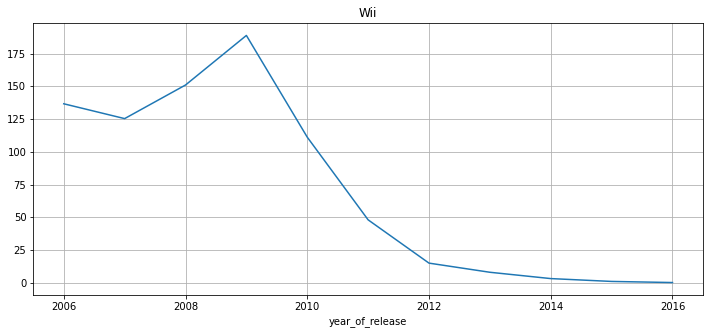

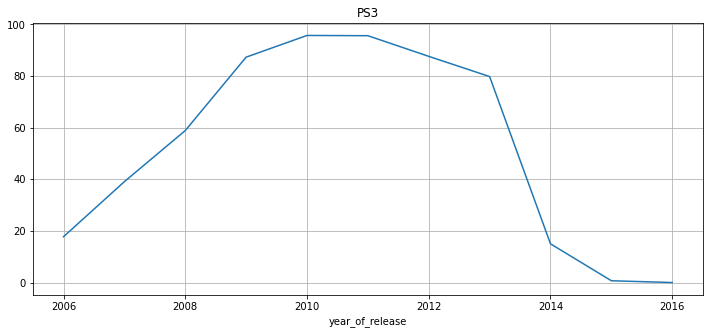

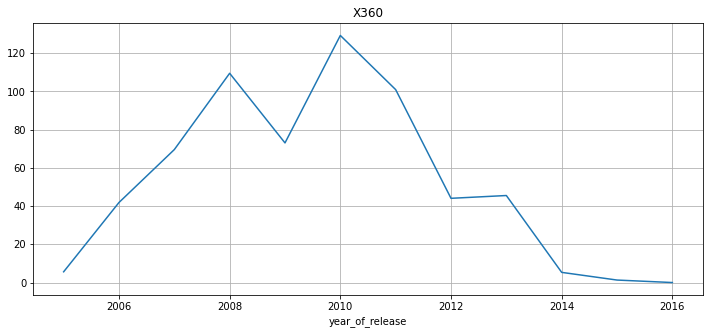

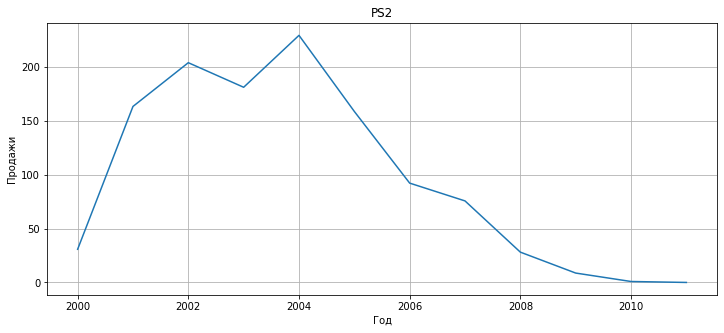

In [35]:
top_list = ["DS","Wii","PS3", "X360","PS2"]
for w in top_list:
    df.loc[df['platform']== w].pivot_table(index='year_of_release', values='total_income', aggfunc='sum').plot(figsize=(12,5),grid=True,legend=False, title=w)    
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()
# Не удалось подписать оси на всех графиках

- Мы видим, что все топовые платформы, которые принесли наибольшую прибыль, больше не активны, т.к. их продажи упали до 0 или близки к нему;

- в 2010 году было две наиболее популярных платформы - X360 и PS3, которые приносили свою пиковую прибыль в 175 и 160 млн. соответсвенно.

- За все время наибольшую пиковую прибыль показала платформа PS2 ~230 млн., однако после этого последовал резкий скачок вниз;

- Также можно предположить на примере платформ PS3, PS2, X360, что средняя продолжительность активности платформы составляет около 10 лет, но так ли это, мы еще проверим.


### Актуализируем данные
Рассмотрим за какой характерный период появляются и исчезают старые платформы.

Формируем датафрейм, куда добавляем столбцы с максимальный и минимальным годом релиза игр, далее вычтем два столбца и получим период, в котором выпускались игры на данную платформу. Год, когда на платформу начали выпускаться игры будем считать выходом платформы, в то же время, год, когда вышли последние игры на платформу, будем считать концом активности данной платформы.

In [36]:
common_period = pd.DataFrame(df.pivot_table(index={'platform'}, values=['year_of_release'], aggfunc=[max,min]))
common_period['difference'] = common_period['max']-common_period['min']
common_period['difference'].sort_values(ascending=False)

platform
PC      24
PS2     11
X360    11
PSP     11
Wii     10
DC      10
PS3     10
GB       9
DS       9
PS       9
GBA      7
XB       7
SNES     7
GC       5
PSV      5
3DS      5
SAT      5
N64      5
WiiU     4
XOne     3
PS4      3
NG       3
WS       2
NES      2
GEN      2
SCD      1
3DO      1
PCFX     0
TG16     0
GG       0
Name: difference, dtype: object

Уберем нулевую разницу и разницу в год и сильно выбивающееся значение в 24 года у PC

In [37]:
common_period = common_period.loc[(common_period['difference'] != 0) &
                                  (common_period['difference'] != 1) &
                                 (common_period['difference'] != 24)]

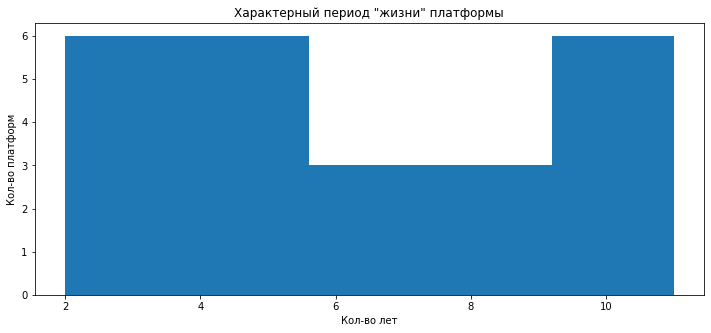

In [38]:
common_period['difference'].plot(kind='hist', bins=5, figsize=(12,5), title='Характерный период "жизни" платформы')
plt.xlabel('Кол-во лет')
plt.ylabel('Кол-во платформ')
plt.show()

На гистограмме, мы видим, что в пределах 4-9 лет основная масса значений. Поэтому возьмем среднее значение.

In [39]:
print('Медиана равна:', common_period['difference'].mean())
print('Ср. значение равно:', common_period['difference'].median())

Медиана равна: 6.458333333333333
Ср. значение равно: 6.0


За характерный период "жизни" платформы будет брать среднее значение, в нашем случае это 6,5 из разницы макс. и мин. значения столбца year_of_release.

Так как характерным периодом жизни платформ является 6.5 лет, предлагаю взять чуть больше половины от этого значения - 4 года. За этот период активности платформы, можно предположить как будут вести себя вышедшие на рынок новые платформы, а также понять у каких платформ падают показатели и которые скоро уйдут с продаж, а какие только начали терять популярность, но возможно еще смогут принести прибыль.

Итак, так как мы решили каким  порогом является актуальность данных, то создадим новый датафрейм, куда добавим только данные от 2012 года.

In [41]:
actual_df.reset_index(drop=True)
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,24.03
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Other,16.65
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Other,11.03
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,15.56
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,14.21


### Лидеры и аутсайдеры продаж

Построим график с продажами платформ по годам

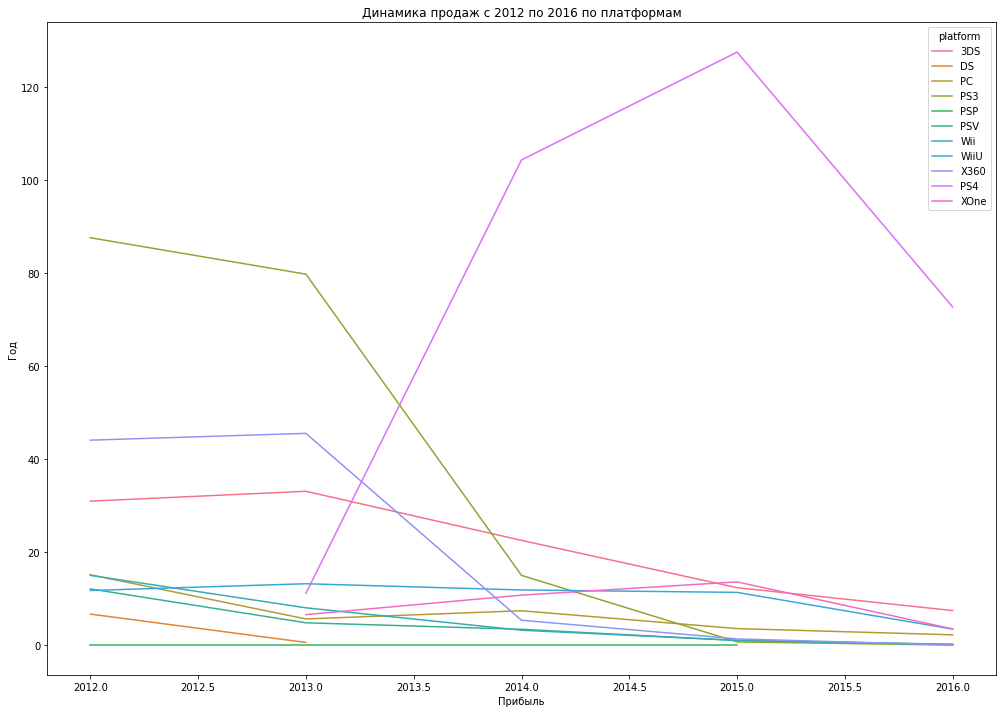

In [42]:
import seaborn as sns
x = pd.DataFrame(actual_df.pivot_table(index=('year_of_release','platform'), values='total_income', aggfunc='sum'))
#plt.style.use("fivethirtyeight")
#platform_list = actual_df['platform'].unique()
plt.figure(figsize=(17,12))
plt.xlabel('Прибыль')
plt.ylabel('Год')
plt.title('Динамика продаж с 2012 по 2016 по платформам')
sns.lineplot(x='year_of_release', y='total_income', hue='platform', data=x.reset_index())
plt.show()

На графике, видно, что продажи таких платформ как DS, PSP, Wii, PS3, X360 утратили свою популярность и перестали приносить прибыль. В лидерах можно отметить PS4 и XOne, однако у них начали снижаться показатели прибыли.

### Диграммы размаха по продажам для платформ

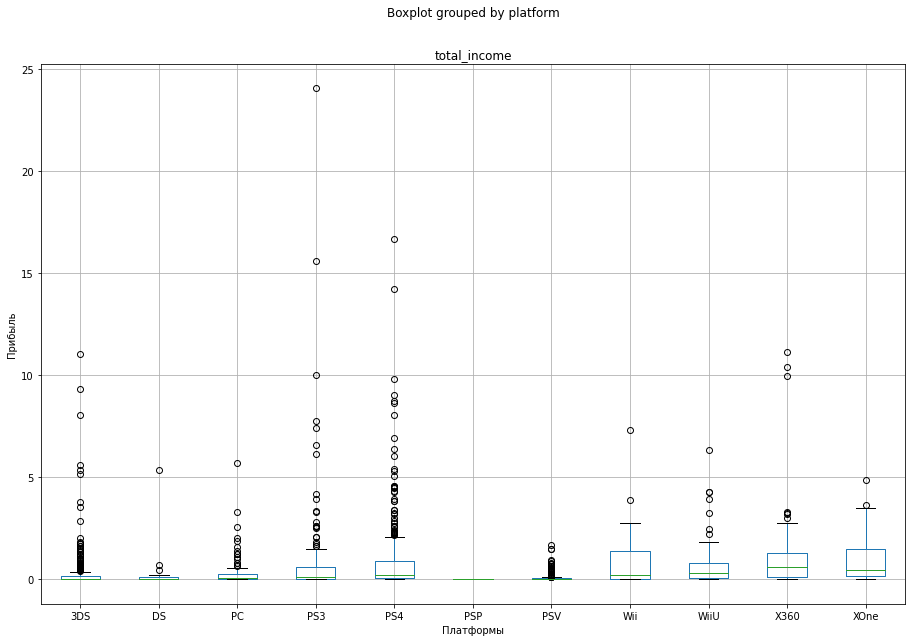

In [43]:
actual_df.boxplot(column='total_income', by='platform',figsize=(15,10))
plt.xlabel('Платформы')
plt.ylabel('Прибыль')
plt.show()

На графике видно, что наиболее высокие продажи игр у таких платформ как: Wii и серии платформ Xbox (оно и понятно). Также можно отметить наиболее низкие продажи у 3DS, DS, PC, PSP, PSV. Однако отдельного внимания заслуживает огромное кол-во аномалий. Предполоижм, что скорее всего это выпуски игр, которые обрели небывалую популярность среди игроков или возможно даже "успешные года", в период которых выпускались популярные игры, особенно это заметно у таких платформы как 3DS, PC, PS3, PS4 и PSV.

### Поиск корреляций

Рассмотрим корреляцию между отзывами игроков/критиков  и продажами на примере PS3 с самым высоким медианным значением.

In [44]:
actual_df_ps3 = actual_df.query('platform == "PS3"')[{'name','na_sales','eu_sales','jp_sales','other_sales','total_income','critic_score','user_score'}]

In [45]:
actual_df_ps3.corr()

,jp_sales,na_sales,user_score,other_sales,critic_score,eu_sales,total_income
jp_sales,1.000000,0.410414,0.116749,0.399557,0.211440,0.390394,0.407214
na_sales,0.410414,1.000000,0.061926,0.926689,0.385995,0.893200,0.953706
user_score,0.116749,0.061926,1.000000,-0.000095,0.451596,-0.031918,0.005199
other_sales,0.399557,0.926689,-0.000095,1.000000,0.375815,0.992602,0.995847
critic_score,0.211440,0.385995,0.451596,0.375815,1.000000,0.379793,0.387847
eu_sales,0.390394,0.893200,-0.031918,0.992602,0.379793,1.000000,0.986534
total_income,0.407214,0.953706,0.005199,0.995847,0.387847,0.986534,1.000000


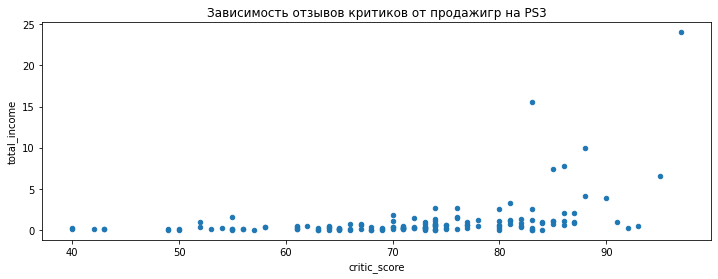

In [46]:
actual_df_ps3.plot(x='critic_score', y='total_income', kind='scatter',figsize=(12,4),title='Зависимость отзывов критиков от продажигр на PS3')
plt.show()

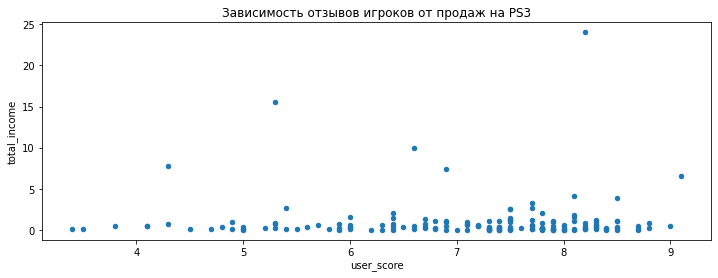

In [47]:
actual_df_ps3.plot(x='user_score', y='total_income', kind='scatter',figsize=(12,4),title='Зависимость отзывов игроков от продаж на PS3')
plt.show()

Внутри платформы PS3 отзывы пользователей никак не влияют на продажи. Между отзывами критиков и продажами уже наблюдается слабая связь. Из интересного, есть связь между отзывами критиков и отзывами пользователей (критики же тоже люди).

Также взглянем на конкурента PS3 - X360.

In [48]:
actual_df_x360 = actual_df.query('platform == "X360"')[{'name','na_sales','eu_sales','jp_sales','other_sales','total_income','critic_score','user_score'}]

In [49]:
actual_df_x360.corr()

,jp_sales,na_sales,user_score,other_sales,critic_score,eu_sales,total_income
jp_sales,1.000000,0.552005,0.087920,0.584347,0.312463,0.632173,0.586946
na_sales,0.552005,1.000000,0.022222,0.977639,0.378376,0.897549,0.990532
user_score,0.087920,0.022222,1.000000,0.032533,0.656500,0.126155,0.048636
other_sales,0.584347,0.977639,0.032533,1.000000,0.360675,0.960880,0.995521
critic_score,0.312463,0.378376,0.656500,0.360675,1.000000,0.348579,0.377961
eu_sales,0.632173,0.897549,0.126155,0.960880,0.348579,1.000000,0.949252
total_income,0.586946,0.990532,0.048636,0.995521,0.377961,0.949252,1.000000


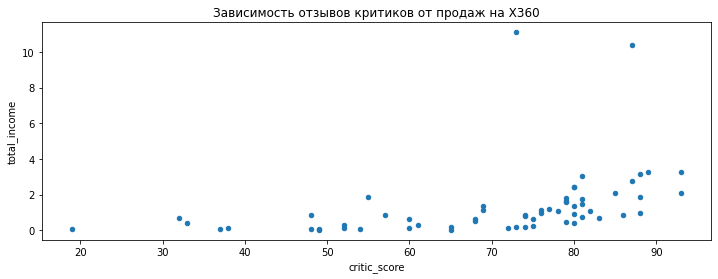

In [50]:
actual_df_x360.plot(x='critic_score', y='total_income', kind='scatter',figsize=(12,4),title='Зависимость отзывов критиков от продаж на X360')
plt.show()

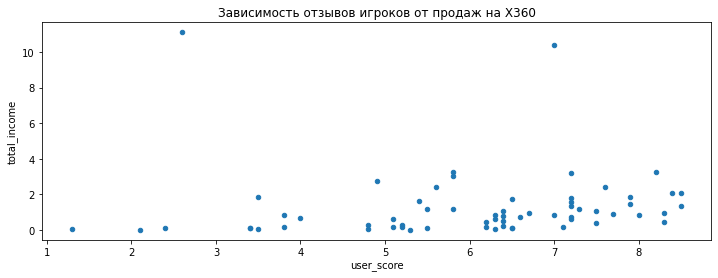

In [51]:
actual_df_x360.plot(x='user_score', y='total_income', kind='scatter',figsize=(12,4),title='Зависимость отзывов игроков от продаж на X360')
plt.show()

Аналогичная картина, свзяь между отзывами пользователей и продажаи игр на X360 нет, но пристуствует слабая связь между отзывами критиков и продажами.

Чтобы точно убедиться, что связи между оценками пользователей и продажами нет, рассмотрим корреляцию на примере PS4.

In [52]:
actual_df_ps4 = actual_df.query('platform == "PS4"')[{'name','na_sales','eu_sales','jp_sales','other_sales','total_income','critic_score','user_score'}]

In [53]:
actual_df_ps4.corr()

,jp_sales,na_sales,user_score,other_sales,critic_score,eu_sales,total_income
jp_sales,1.000000,0.493776,0.165725,0.512038,0.344006,0.474411,0.511050
na_sales,0.493776,1.000000,0.007968,0.943790,0.432037,0.781290,0.929172
user_score,0.165725,0.007968,1.000000,-0.021409,0.605664,-0.045701,-0.025309
other_sales,0.512038,0.943790,-0.021409,1.000000,0.426254,0.943358,0.999018
critic_score,0.344006,0.432037,0.605664,0.426254,1.000000,0.359688,0.420058
eu_sales,0.474411,0.781290,-0.045701,0.943358,0.359688,1.000000,0.956652
total_income,0.511050,0.929172,-0.025309,0.999018,0.420058,0.956652,1.000000


У платформы PS4 зависимости между продажами и отзывами пользователей тоже нет.

Таким образом, на продажи у топовых платформ оценки пользователей никак не влияют, что не скажешь про оценки критиков. Люди больше просматривают оценки именно критиков перед покупкой, скорее всего это доверие более опытным и независмым экспертам. Возможно оценки пользователей не отражают реальную картину и не дают полноценное представление об игре, т.к. сколько людей столько и мнений, игроки оценивают игры перед покупкой по трейлерам, по концепции игры, а не по рекомендациям.

### Рассмотрим распределение игр по жанрам и продажам

Для начала взглянем на общее распределение игр по жанрам

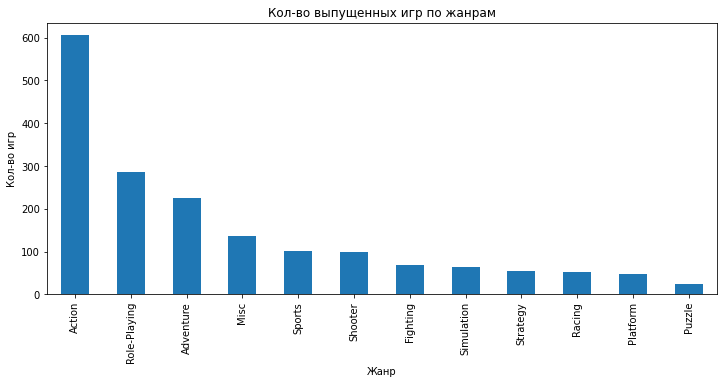

In [54]:
game_genre = actual_df.groupby('genre')['name'].count().sort_values(ascending=False)
game_genre.plot(kind='bar', figsize=(12,5), title='Кол-во выпущенных игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во игр')
plt.show()

Сразу бросается в глаза, насколько игроки любят жанр Action, в два раза больше выпущенных игр от ближайшего соперника Role-Playing. И действительно, людям куда больше нравятся динамичные и веселые игры нежели чем игры головоломки (Puzzle),у которых наименьшее кол-во выпущенных игр. Также в топ-5 входят такие жанры как: Role-Playing, Adventure, Sports и Shooter у всех примерно одинковое кол-во игр.

Теперь глянем как продажи зависят от жанра

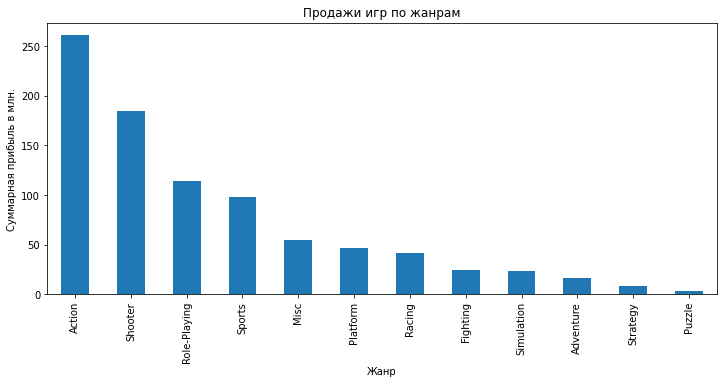

In [55]:
genre_income = actual_df.groupby('genre')['total_income'].sum().sort_values(ascending=False)
genre_income.plot(kind='bar', figsize=(12,5), title='Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарная прибыль в млн.')
plt.show()

Также построим график средних показателей продаж игр по жанрам

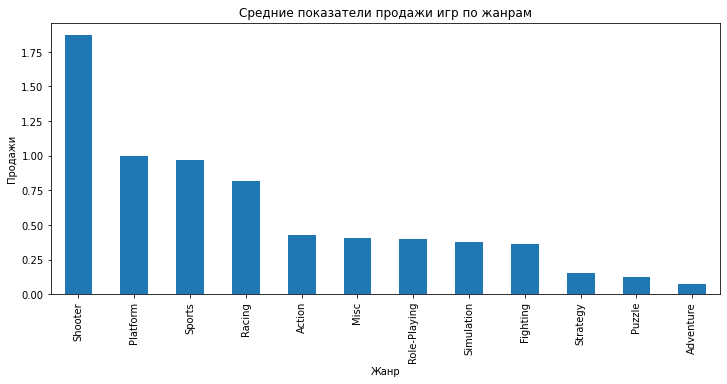

In [56]:
genre_income_mean = actual_df.groupby('genre')['total_income'].mean().sort_values(ascending=False)
genre_income_mean.plot(kind='bar', figsize=(12,5), title='Средние показатели продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

Схожая картина: наиболее прибыльным жанром все также является Action. Shooter, Sports, Role-Playing поменяли свои места, но по прежнему входят в пятерку лучших, чего не скажешь про жанр Adventure, его заменил Misc. А вот у средних продаж игр по жанрам, ситуация в корне изменилась. Самые высокие средние показатели у Shooter, далее идут Platform, Sports и Racing, наиболее низкие же продажи у Adventure. Action же расположился на 5-ом месте. Возможно это связано с играми, которые обрели небывалую популярность - "бестселлеры".

Просмотрев графики распределения прибыли и кол-ва выпущенных игр по жанрам, можно прийти к следующим выводы:
    
    1) Жанр Action является самым прибыльным делом, поэтому и большинство игр выпускаются именно в этом жанре
    
    2) Puzzle же напротив является самым низкоприбыльным жанром с наименьшим количеством выпущенных игр.
    
    3) Также популярными жанрами игр являюются: Shooter, Sports, Role-Playing они как хороши в показателе выпуска игр, так и в прибыле, которую приносят.
        
    4) А вот по жанру Adventure неоднозначные итоги, игр выходит достаточно, так как входит в пятерку лучших, однако продажи отстают от ближайшего соперника Misc, который и обогнал жанр по продажам, несмотря на меньше выпущенных игр.

    5) Стоит отметить и игры "бестселлеры", которые могут приносить большую часть прибыли платформам, это особенно видно на графиках боксплот по продажам игр в разрезе платформ.

### Итоги 
В ходе данного шага:

    -Просмотрели как выпускались по годам и выяснили, что в период до 1991, игровая индустрия не пользовалась популярностью, поэтому опустили игры, вышедшие до начала роста игровой индустрии;
    
    -Нашли наиболее прибыльные платформы за все время и посмотрели как вели себя их продажи в периоды активности платформ. Отобрали топ 5 платформ(PS2, X360, PS3, Wii, DS) и построили по ним графики;
    
    -Просмотрели периоды активности платформ (по выпускаемым по ним играм) и нашли среднее время "жизни" платформы - 6,5 лет. После чего, актуализировали данные, убрав предыдущие года до 2012 года актуальности. Взяли именно чуть больше половины среднего значения, чтобы посмотреть как ведут себя платформы только набирающие популярность, а также те, которые начинают терять выручку.
    
    -Просмотрели как ведут себя лидеры и отстающие платформы в актуальный период, а также построили 'ящик с усами' продаж по платформам, что подтвердило наши выводы о лидерах рынка;
    
    -Также выяснили, есть ли влияние других показателей на прибыль у топовых платформ, как оказалось только отзывы критиков могут повышать продажи игр. Также, есть связь между отзывами пользователей и критиков, однако корреляции между отзывами игроков и продажами нет.
    
    -Выяснили какие жанры являются наиболее популярными по кол-ву игр и наиболее прибыльными. В пятерке лучших по прибыли оказались Action, Shooter, Sports, Role-Playing и Misc. Но топ-5 по кол-ву выпускаемых игр немного другой: Action, Shooter, Sports, Role-Playing и Adventure.

## Портрет пользователя региона

### Северная Америка
Начнем с пользователей Северной Америки NA. Взглянем на самые популярные платформы среди игроков, а также на жанры.

Взглянем на  наиболее популярные платформы

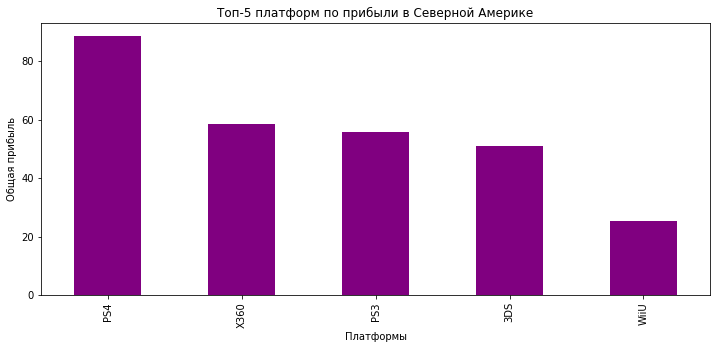

In [57]:
top_NA = pd.DataFrame(actual_df.pivot_table(index='name', values = ('na_sales', 'genre','platform', 'rating'), aggfunc=({"na_sales": 'first', 'genre': 'first','platform':'first','rating':'first'})))
top_NA.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,5),color='purple', title='Топ-5 платформ по прибыли в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Общая прибыль')
plt.show()

Мы видим, что приставка PS4  пользуются наибольшей популярностью среди игроков в Северной Америке (около 90 млн прибыли), далее идут X360 с чуть большими продажами чем у PS3 и 3DS (в районе 60 млн.). На последнем же месте расположилисись платформы WiiU(около 30 млн продаж).

Посмотрим на самые популярные жанры

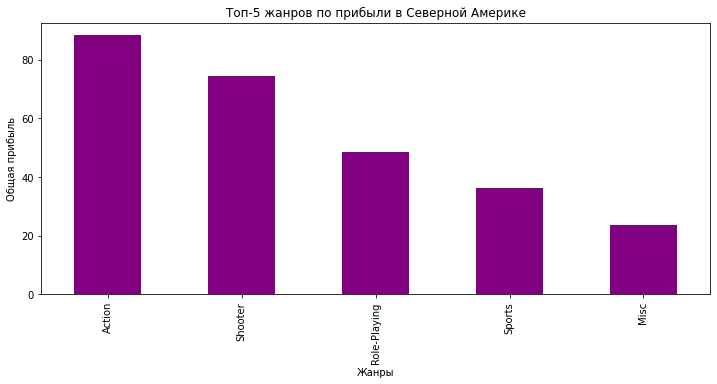

In [58]:
top_NA.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,5),color='purple', title='Топ-5 жанров по прибыли в Северной Америке' )
plt.xlabel('Жанры')
plt.ylabel('Общая прибыль')
plt.show()

Для пользователей Северной Америки самым популярнымм жанром является Action, однако Shooter не сильно отстатет от него. Менее прибыльными оказались Role-Playing, Sports и Misc.
Как у я уже говорил, динамичные игры выглядят более привлекательными и интересными для большинства людей.

### Европа

In [59]:
top_EU = pd.DataFrame(actual_df.pivot_table(index='name', values = ('eu_sales', 'genre','platform', 'rating'), aggfunc=({"eu_sales": 'first', 'genre': 'first','platform':'first','rating':'first'})))

Посмотрим на наиболее популярные платформы в Европе

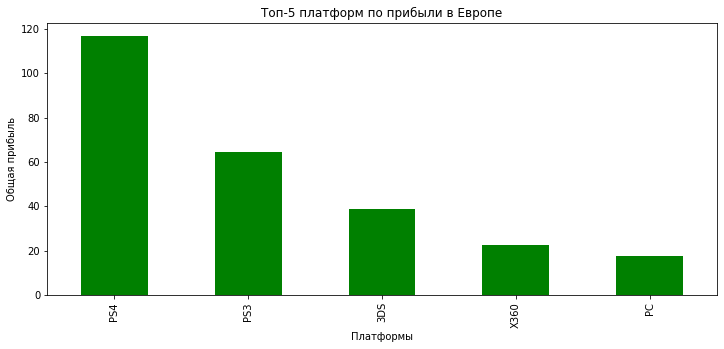

In [60]:
top_EU.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,5),color='green', title='Топ-5 платформ по прибыли в Европе' )
plt.xlabel('Платформы')
plt.ylabel('Общая прибыль')
plt.show()

PS4 по прежнему занимает лидирующую позицию, однако дальше топ сменился. В Европе платформа WiiU не пользуется такой популярностью, как PC. Также люди отдают предпочтение больше PS3 чем X360. Также стоит отметить, что продажи игр на PS4 В Европе больше чем Северной Америке примерно на ~30 млн.

Взглянем на жанры

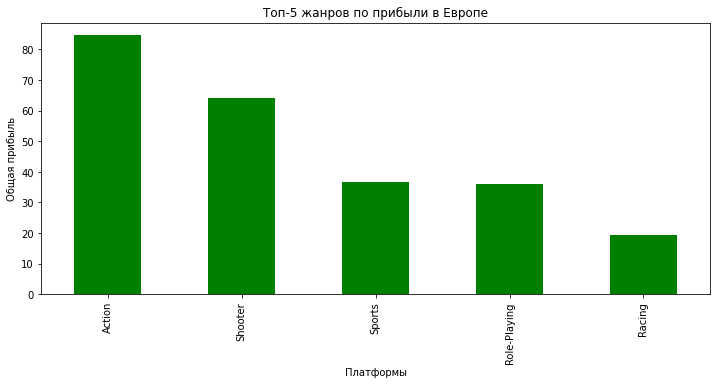

In [61]:
top_EU.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,5),color='green', title='Топ-5 жанров по прибыли в Европе' )
plt.xlabel('Платформы')
plt.ylabel('Общая прибыль')
plt.show()

Также как и с платформами, первые места у Европы и Северной Амеркии одинаковые, по прибыльности в жанрах лидирующую позицию занимает Action. Хоть и не на много Sports обошел Role-Playing, а закрывает список топ-5 жанр Racing.

### Япония

In [62]:
top_JP = pd.DataFrame(actual_df.pivot_table(index='name', values = ('jp_sales', 'genre','platform', 'rating'), aggfunc=({"jp_sales": 'first', 'genre': 'first','platform':'first','rating':'first'})))

Построим столбчатую диаграмму для прибыли по жанрам для игроков из Японии.

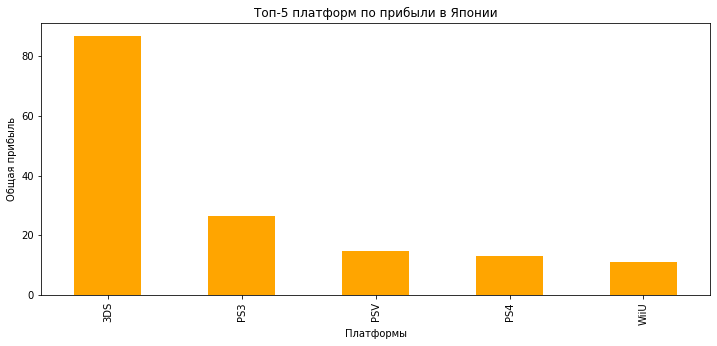

In [63]:
top_JP.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,5),color='orange', title='Топ-5 платформ по прибыли в Японии' )
plt.xlabel('Платформы')
plt.ylabel('Общая прибыль')
plt.show()

В Японии с большим отрывом лидирующую строчку занимает платформа 3DS. Далее идут приставки от компании SONY, а замыкает топ WiiU. В пятерке лучших платформ по продажам игр только компании Японских производителей. Возможно, 3DS была прорывом в период её активности среди всех дургих платформ, так как в данной консоли была реализованная функция 3D изображения без использования вспомогательных инструментов (очки).

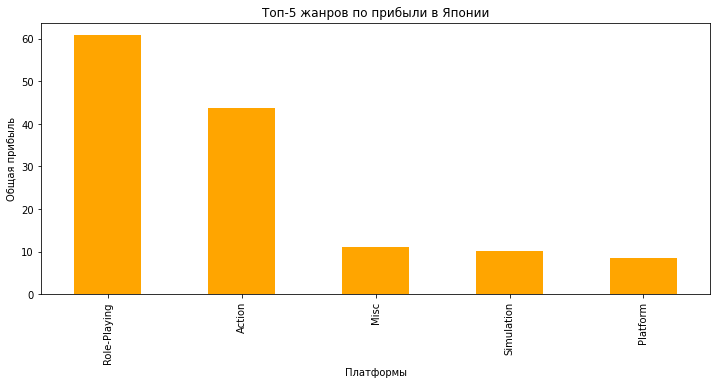

In [64]:
top_JP.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,5),color='orange', title='Топ-5 жанров по прибыли в Японии' )
plt.xlabel('Платформы')
plt.ylabel('Общая прибыль')
plt.show()

И тут Япония отличилась. Наиболее прибльным жанром среди японских игроков является Role-Playing, на втором же месте расположился Action. А вот у оставшихся трех жанров примерно одинаковые низкие показатели продаж на фоне первых двух. В чем же такой большой интерес к играм Role-Playing и Action среди японских игроков? Возможно именно аниме и комиксы привили любовь у японцев к данным жанрам. Играть за любимых и знакомых персонажей, быть участником и их товарищами в увлекательных историях, что может быть лучше?

### Рейтинг ESRB

Взглянем как ведут себя продажи у разных рейтингов в отдельных регионах

#### Северная Америка

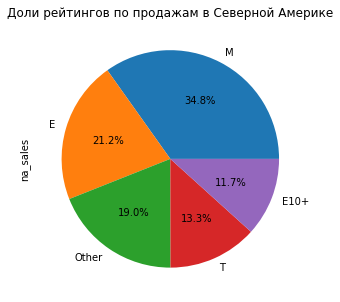

In [65]:
top_NA.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie',figsize=(5,5),title='Доли рейтингов по продажам в Северной Америке',autopct='%1.1f%%')
plt.show()

В Северной Америке за период с 2012 по 2016 год больше трети продаж были игры с рейтингом "M", в то время как наименьшим доходным рейтингом является "E10+". Также игры с рейтингом "T" и "E" занимают по ~25% от общих продаж в Северной Америке.

#### Европа

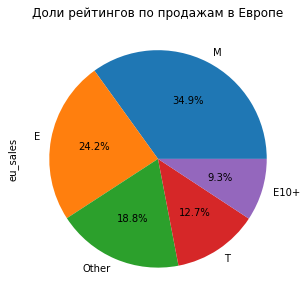

In [66]:
top_EU.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie',figsize=(5,5),title='Доли рейтингов по продажам в Европе',autopct='%1.1f%%')
plt.show()

В Европе схожая ситуация, что и в Северной Америке. Наибольшая часть проданных игр имеет рейтинг "M", в то время как наименьшая "E10+". Однако в Европе игры с рейтингом "E" значимо более популярны чем игры рейтинга "T".

#### Япония

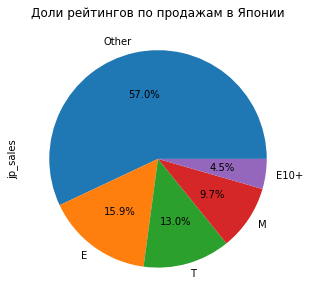

In [67]:
top_JP.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie',figsize=(5,5),title='Доли рейтингов по продажам в Японии',autopct='%1.1f%%')
plt.show()

Кардинальные различия, как и в топовых платформах и жанрах до этого. Больше половины проданных игр в Японии в период с 2012 по 2016 имеют рейтинг "T", наименьшая доля у "E10+". Далее десятая часть от продаж составляют игры рейтинга "M", и ~28% игры с рейтингом "E".

### Итог

По итогам анализа топовых продаж по жанрам и платформам, а также наиболее прибыльными рейтингами, можно сформулировать следующие выводы:

1) Типичным игроком в Северной Америке является пользователь, который предпочитает платформу PS4, а также игры в жанре Action (реже Shooter), c рейтингом "M" . Так как рейтинг 17+, а значит в основном игроки являются совершеннолетними, возможно даже это люди среднего возраста.

2) Для Европе же типичным игроком будет также обладатель PS4, который имеет схожие вкусы в жанрах, что и в Северном Америке (Action, Shooter). Здесь как и в Северной Америке аудитория взрослая, судя по популярному рейтингу в 17+.

3) Япония же кардинально отличается игроками. Большая часть игроков это пользователи платформы 3DS, которе играют в Role-Playing игры (реже в Action) c рейтингом "T". В Японии скорее всего, больше игроков это подростков (от 13 до 18 лет), однако удтверждать, что это только подрости мы не можем, так как взрослые люди также могут играть в игры рейтинга "T" (13+).

## Проверка гипотез

Проверку гипотез будем осуществлять с применением t-теста. С пороговымм значением alpha = 0.05

### Средний рейтинг пользователей платформ Xbox One и PC одинаковые.

H0 - Средний рейтинг пользователей платформ Xbox One = среднему рейтингу пользователей PC.

H1 - Средний рейтинг пользователей платформ Xbox One != среднему рейтингу пользователей PC.

В нашем случае альтернативная гипотеза двусторонняя. T-test будет проводится для двух независимых выборок, поэтому до начала теста проверим дисперсии выборок.


In [68]:
xone_score = actual_df.loc[actual_df['platform'] == 'XOne','user_score']
pc_score = actual_df.loc[actual_df['platform'] == 'PC','user_score']
print('Дисперсия XOne:',(xone_score.std())**2 )
print('Дисперсия PC:',(pc_score.std())**2)

Дисперсия XOne: 1.2009686609686612
Дисперсия PC: 2.6570502983802218


Так как значения дисперсии не равны, то укажем False в параметре equal_var

In [69]:
alpha = 0.05
print(f'среднее первой выборки: {np.mean(xone_score)}')
print(f'среднее второй выборки:{np.mean(pc_score)}')
result1 = st.ttest_ind(xone_score, pc_score, equal_var=False)
print('p-значение:', result1.pvalue)
if result1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки: 6.7592592592592595
среднее второй выборки:6.736231884057971
p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Мы не можем отвергнуть нулевую гипотезу, значит скорее всего достоверно то, что средний рейтинг пользователей двух платформ одинаковый, при уровне значимости в 5%. 

### Средние пользовательские рейтинги жанров Action и Sports разные

H0 - Средний рейтинг пользователей, играющих в жанр Action  = среднему рейтингу пользователей игр Sports.

H1 - Средний рейтинг пользователей, играющих в жанр Action != среднему рейтингу пользователей игр Sports.

В нашем случае альтернативная гипотеза двусторонняя. T-test будет проводится для двух независимых выборок, перед началом проверим дисперсии выборок.


In [70]:
action_score = actual_df.loc[actual_df['genre'] == 'Action','user_score']
sports_score = actual_df.loc[actual_df['genre'] == 'Sports','user_score']
action_score = action_score[action_score.notna()]
sports_score = sports_score[sports_score.notna()]
print('Дисперсия Action:',(action_score.std())**2 )
print('Дисперсия Sports:',(sports_score.std())**2)

Дисперсия Action: 1.7387686365782908
Дисперсия Sports: 2.3760250391236304


In [71]:
print(f'среднее первой выборки: {np.mean(action_score)}')
print(f'среднее второй выборки:{np.mean(sports_score)}')
result2 = st.ttest_ind(action_score, sports_score, equal_var=False)
print('p-значение:', result2.pvalue)
if result2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки: 7.056147540983606
среднее второй выборки:5.905555555555555
p-значение: 9.343185645493527e-08
Отвергаем нулевую гипотезу


По итогам теста с уровнем значимости в 5%, отвергаем нулевую гипотезу в пользу альтернативной. Это означает, что скорее всего наше предположение о том, что средние оценки пользователей у жанров Action и Sport разные - верное.

### Итоги
По итогам проверки гипотез, обе нулевые гипотезы не удалось опровергнуть, что значит:

- Предположительно средний рейтинг пользователей платформ XOne и PC одинаковый. При уровне значимости в 5%, мы можем сказать, что это истинное удтверждение.

- В случае с равными пользовательскими рейтингами у жанров Action и Sports, есть основание удтверждать, что пользовательские рейтинги не равны, нулевая гипотеза опровергнута в пользу альтернативной. Поэтому исходное предположение скорее всего верное.

## Вывод
По итогам данного исследования:
- Исходные данные представляли из себя информацию о выпущенных играх с определенными параметрами (платформа, год релиза, выручка по регионам, рейтинг игры и др.). В датафрейме было довольно много пропусков, а также некорректные данные у некоторых столбцов;
- В ходе предобработки данных, удалили явные дубликаты, к счастью их оказалось всего 2. Исправили тип данных у двух столбцов - year_of_release и critic_score, а также привели названия всех столбов к нижнему регистру. Пропущенные значения исправили только в столбце rating на other, в столбцах user_score и critic_score оставили пропуски как есть, так как оценки сугубо индивидуальны, а таже отследить какую либо зависимость с другим параметром невозомжно. Также не удалось исправить пропуски в столбце year_of_release, поэтому данные пришлось опустить, но так как кол-во пропусков состовляло всего 269, то критики нет;
- Далее провели иследовательский анализ. Просмотрели как выпускались игры за весь период в исходных данных и отсеяли не информативные года (с 1985 по 1991). Просмотрели поведение по продажам игр наиболее популярных платформ, а также построили отдельно графики для пятерки самых прибыльных платформ за все время и посмотрели их периоды активности. Актуализировали данные: нашли средний период "жизни" платформы - 6,5 и оставили данные только за период 2012-2016 год (чуть больше половины от среднего периода "жизни" платформы). Построили "ящик с усами" по продажам игр для актуальных платформ и изучили лидеров рынка. Выявили, что отзывы критиков влияют на продажи, чем выше оцека, тем выше продажи. Также определили лидеров жанров по прибыли/кол-ву выпущенных игр. Основными претендентами были: Action, Shooter, Sports, Role-Playing, Adventure и Misc. Однако продажи сильно зависят от выбросов, так называемых "бестселлеров", которые могут составлять большую часть выручки.
- Описали портреты типичных игроков в разных регионах. Для Северной Америки, характерны соверешеннолетние игроки с PS4, играющие в Action (реже Shooter). Для Европы также совершеннолетние игроки, предпочитающие PS4 и жанры Action, Shooter. Для Японии же основными игроками являются подростки (13+) с любимым жанром Role-Playing.
- Провели проверки двух гипотез, одна из которых подвердилась, а другая опроверглась. Как итог,  можно предполагать, что средние оценки пользователей у платформ PC и XOne одинаковые, но рейтинги пользователей у двух жанров Action и Sports, скорее всего разные, что подтверждает наше предположение.

В целом рекоммендации на 2017 год такие: В ближайшее время, а именно ~2-3 года, наиболее популярными платформами на рынках Европы и Северной Америки будут PS4 и XOne, также в этих регионах пользуются большим спросом игры таких жанров как Action и Shooter, поэтому упор рекламных кампаний следует делать именно на них. Также стоит обращать внимание на игры жанра выше 17 лет, так как именно они и приносят больше всего прибыли. Среди оставшегося списка, можно выбирать игры, где наиболее высокие оценки критиков, так как они напрямую влияют на продажи.

Что касается Японского рынка, то тут ситуация отличается. Здесь же стоит присмотреться именно к играм на платформе 3DS, также к жанрам Role-Playing и Action. Большая часть пользователей это подростки (13+), поэтому стоит делать акцент именно на игры рейтинга "T", так как они приносят больше половины прибыли.